<a href="https://colab.research.google.com/github/egesendogan/CIFAR-10-Classification-Using-PyTorch/blob/main/First%20Model/VGG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size = 64

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True,num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False,num_workers=2)

dataloaders = {'train':torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True,num_workers=2),
               'test': torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False,num_workers=2)}

dataset_sizes = {'train':50000,'test':10000}

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


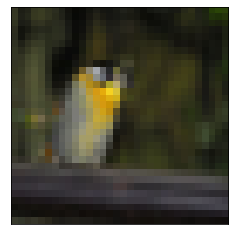

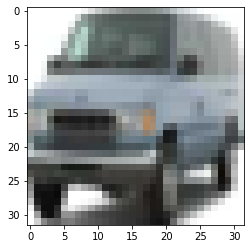

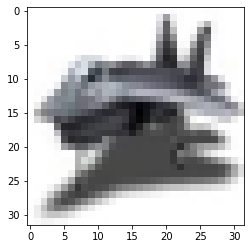

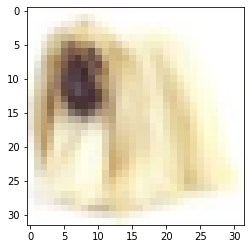

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# Afficher les images et les labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(4) : 
  axe = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
  imshow(images[idx])
  axe.set_title(classes[labels[idx]])

# Models



1. Baseline: VGG Block


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#model.add(Conv2D(32 --> output size , (3, 3) --> kernel size)
class VGG_1block(nn.Module):
  def __init__(self):
    super().__init__()
    #conv layers
    self.conv_layers = nn.Sequential(nn.Conv2d(3,32,kernel_size=3,padding=1),
                                     nn.ReLU(),
                                     #nn.MaxPool2d(2,2),
                                     nn.Conv2d(32,32,kernel_size=3,padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2,2)
                                     )
    
    # fc layers 32*16*16
    self.fc_layers = nn.Sequential(nn.Linear(in_features=32*16*16,out_features=128),
                                   nn.Linear(in_features=128,out_features=10))

  def forward(self,x):
    x = self.conv_layers(x)
    x = torch.flatten(x, 1)
    x = self.fc_layers(x)
    return x

vgg_1block_network = VGG_1block()

2. Loss Function and Optimizer



In [ ]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_1block_network.parameters(),lr=0.001,momentum=0.9)

3. Training

In [ ]:
"""for epoch in range(25):
  running_loss = 0.0
  for i, data in enumerate(train_loader,0):
    inputs,labels = data
    optimizer.zero_grad()
    outputs = vgg_1block_network(inputs)
    _loss = loss(outputs, labels)
    _loss.backward()
    optimizer.step()

    running_loss += _loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')"""

In [ ]:
import time
import copy

In [ ]:
since = time.time()

best_acc = 0.0

all_loss = {'train':[],'test':[]}
all_acc = {'train':[],'test':[]}

for epoch in range(25):
  print('Epoch {}/{}'.format(epoch, 25 - 1))
  print('-' * 10)

  # Each epoch has a training and validation phase
  for phase in ['train', 'test']:
    if phase == 'train':
      vgg_1block_network.train()  # Set model to training mode
    else:
      vgg_1block_network.eval()   # Set model to evaluate mode

    running_loss = 0.0
    running_corrects = 0

    # Iterate over data.
    for inputs, labels in dataloaders[phase]:

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward
      # track history if only in train
      with torch.set_grad_enabled(phase == 'train'):
        outputs = vgg_1block_network(inputs)
        _, preds = torch.max(outputs, 1)
        _loss = loss(outputs, labels)

        # backward + optimize only if in training phase
        if phase == 'train':
          _loss.backward()
          optimizer.step()

      # statistics
      running_loss += _loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)  

    epoch_loss = running_loss / dataset_sizes[phase]
    epoch_acc = running_corrects.double() / dataset_sizes[phase]

    all_loss[phase].append(epoch_loss)
    all_acc[phase].append(epoch_acc)

    print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

    # deep copy the model
    if phase == 'test' and epoch_acc > best_acc:
      best_acc = epoch_acc
      best_model_wts = copy.deepcopy(vgg_1block_network.state_dict())
    
    print()

  time_elapsed = time.time() - since
  
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
print('Best val Acc: {:4f}'.format(best_acc))

vgg_1block_network.load_state_dict(best_model_wts)

Epoch 0/24
----------
train Loss: 1.9698 Acc: 0.3052

test Loss: 1.7335 Acc: 0.3881

Epoch 1/24
----------
train Loss: 1.6343 Acc: 0.4296

test Loss: 1.5339 Acc: 0.4627

Epoch 2/24
----------
train Loss: 1.4553 Acc: 0.4860

test Loss: 1.3815 Acc: 0.5038

Epoch 3/24
----------
train Loss: 1.3224 Acc: 0.5321

test Loss: 1.2872 Acc: 0.5383

Epoch 4/24
----------
train Loss: 1.2313 Acc: 0.5689

test Loss: 1.2235 Acc: 0.5614

Epoch 5/24
----------
train Loss: 1.1560 Acc: 0.5956

test Loss: 1.1611 Acc: 0.5893

Epoch 6/24
----------
train Loss: 1.0910 Acc: 0.6183

test Loss: 1.1086 Acc: 0.6047

Epoch 7/24
----------
train Loss: 1.0309 Acc: 0.6406

test Loss: 1.0761 Acc: 0.6231

Epoch 8/24
----------
train Loss: 0.9869 Acc: 0.6548

test Loss: 1.0702 Acc: 0.6215

Epoch 9/24
----------
train Loss: 0.9470 Acc: 0.6703

test Loss: 1.0258 Acc: 0.6446

Epoch 10/24
----------
train Loss: 0.9128 Acc: 0.6849

test Loss: 1.0295 Acc: 0.6408

Epoch 11/24
----------
train Loss: 0.8789 Acc: 0.6940

test Loss

<All keys matched successfully>

In [ ]:
PATH2 = './vgg_1block2.pth'
torch.save(vgg_1block_network.state_dict(), PATH2)

In [ ]:
import pickle

a_file = open("data.pkl", "wb")
pickle.dump(all_loss, a_file)
a_file.close()

b_file = open("data2.pkl", "wb")
pickle.dump(all_acc, b_file)
b_file.close()

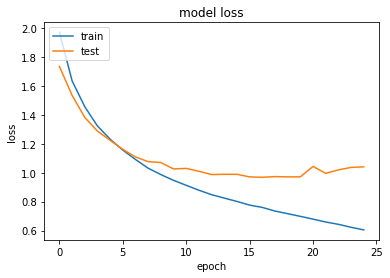

In [ ]:
from matplotlib import pyplot as plt
plt.plot(all_loss['train'])
plt.plot(all_loss['test'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

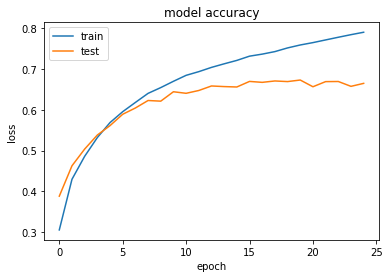

In [ ]:
plt.plot(all_acc['train'])
plt.plot(all_acc['test'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
vgg_1 = VGG_1block()
vgg_1.load_state_dict(torch.load(PATH2))

<All keys matched successfully>

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = vgg_1(images)

    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 67 %
